In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


In [5]:
stand_scale = StandardScaler()

x_train_trans = stand_scale.fit_transform(X_train)
x_valid_trans = stand_scale.transform(X_valid)
x_test_trans = stand_scale.transform(X_test)

In [6]:
input = keras.layers.Input(shape=x_train_trans.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input],
                           outputs=[output])

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

In [7]:
model.compile(optimizer= keras.optimizers.SGD(0.001), loss="mse")

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [9]:
history = model.fit(x_train_trans, y_train, 
                    validation_data=(x_valid_trans, y_valid), 
                    epochs=100, 
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5141 - val_loss: 0.8213
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7050 - val_loss: 0.7268
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6467 - val_loss: 0.6812
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6130 - val_loss: 0.6460
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5841 - val_loss: 0.6224
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5641 - val_loss: 0.6065
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5459 - val_loss: 0.5811
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5306 - val_loss: 0.5659
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5202 - val_loss: 0.5563
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5105 - val_lo

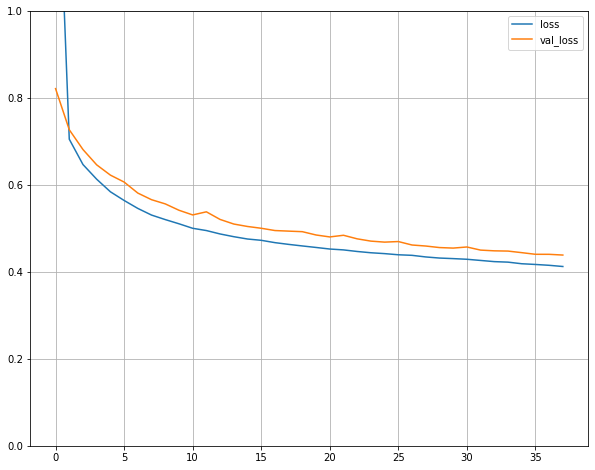

In [10]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [12]:
model.evaluate(x_test_trans, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4343


0.43431636691093445